# Web traffic timeseries

https://www.kaggle.com/c/web-traffic-time-series-forecasting

## Build a basic model

In [6]:
import numpy as np
import pandas as pd

In [2]:
training_set_sample = pd.read_csv('train_1_sample.csv')

In [130]:
training_set_sample[0:5]

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0     ...            32.0        63.0        15.0        26.0   
1        10.0     ...            17.0        42.0        28.0        15.0   
2         4.0     ...             3.0         1.0         1.0         7.0   
3        11.0     ...            32.0        10.0        26.0        27.0   
4         NaN     ...            48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [178]:
p1_data = (np.array(training_set_sample)[:,1:2]).astype('float32')

In [179]:
p1_data

array([[ 18.],
       [ 11.],
       [  1.],
       ..., 
       [  1.],
       [  2.],
       [ 14.]], dtype=float32)

In [180]:
p1_data.shape

(2999, 1)

In [188]:
for i in range(0, len(p1_data)):
	if pd.isnull(p1_data[i]):
		p1_data[i] =avg

In [189]:
p1_x = []
p1_y = []
for i in range(100, len(p1_data)):
	p1_x.append(p1_data[i - 100: i, 0])
	p1_y.append(p1_data[i, 0])

p1_x_np = np.array(p1_x)
p1_x_np = np.reshape(p1_x_np, (p1_x_np.shape[0], p1_x_np.shape[1], 1))
p1_y_np = np.array(p1_y)

In [190]:
model = Sequential()

In [191]:
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units = 10, input_shape= (p1_x_np.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p1_x_np, p1_y_np, epochs = 2)

pred_in = p1_data[100:200,0]
pred_in_r = np.reshape(pred_in, (-1,100,1))

model.predict(pred_in_r)

Epoch 1/2
2899/2899 [==============================] - 28s - loss: 18307.0709    
Epoch 2/2
2899/2899 [==============================] - 29s - loss: 18254.8689    


array([[ 2.72745204]], dtype=float32)

### Basic model with multiple pages as input

replace all NaN in each row with average of that row

In [288]:
training_set_sample.shape

(50, 551)

In [289]:
training_set_sample = training_set_sample[0:50]

In [290]:
def reshapek(k):
    return k.reshape(k.shape[0], k.shape[1], 1)

In [294]:
print(len(training_set_sample.iloc[10,1:]))

550


In [324]:
p = 100
p_x = np.array([[]])
p_y = np.array([])
for i in range(0, training_set_sample.shape[0]):
    row = training_set_sample.iloc[i,1:]
    avg = np.average(row[pd.notnull(row)])
    new_row = row.fillna(avg)
    for j in range(p, len(row)):
        #print(i, j)
        if i == 0 and j == p:
            p_x = new_row[0: p]
            p_y = new_row[p]
        else:
            p_x = np.vstack((p_x, new_row[j - p: j]))
            #print(p_x.shape)
            p_y = np.vstack((p_y, new_row[p]))
            #np.append(p_y, new_row[p])

In [314]:
print(p_x.shape)
print(p_y.shape)

(22500, 100)
(22500, 1)


In [315]:
from keras.models import Sequential
from keras.layers import LSTM

In [322]:
p_x_reshaped = p_x.reshape(p_x.shape[0], p_x.shape[1], 1)

In [321]:
model = Sequential()
model.add(LSTM(units = 10, input_shape= (pall_x.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p_x_reshaped, p_y, epochs = 2)

Epoch 1/2
22500/22500 [==============================] - 225s - loss: 874.2990   
Epoch 2/2
22500/22500 [==============================] - 211s - loss: 645.9307   


# Analyse the data

Load entire dataset

In [115]:
training_set = pd.read_csv('train_1.csv')

understand the shape

In [5]:
training_set.shape

(145063, 551)

look at a sample

In [6]:
training_set[0:5]

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0     ...            32.0        63.0        15.0        26.0   
1        10.0     ...            17.0        42.0        28.0        15.0   
2         4.0     ...             3.0         1.0         1.0         7.0   
3        11.0     ...            32.0        10.0        26.0        27.0   
4         NaN     ...            48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

## Split page column

In [ ]:
df_new = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [131]:
training_set = training_set.drop('Page', 1)

In [165]:
train_new = pd.concat([training_set, df_new], axis = 1)
train_new[0:5]

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10   ...    2016-12-25  \
0         9.0        22.0        26.0        24.0   ...          26.0   
1        22.0        11.0        10.0         4.0   ...          15.0   
2         0.0         3.0         4.0         4.0   ...           7.0   
3        14.0         9.0        11.0        16.0   ...          27.0   
4         NaN         NaN         NaN         NaN   ...          13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0        14.0        20.0        22.0        19.0        18.0        20.0   
1         9.0        30.0        52.0        45.0        26.0        20.0   
2         4.0         4.0         6.0         3.0         4.0        17.0   
3        16.0        11.0        17.0        19.0        10.0        11.0   
4         3.0        11.0        27.0        13.0        36.0        10.0   

            project      access   agent  
0  zh.wikipedia.org  all-access  spider  
1  zh.wikipedia.org  all-access  spider  
2  zh.wikipedia.org  all-access  spider  
3  zh.wikipedia.org  all-access  spider  
4  zh.wikipedia.org  all-access  spider  

[5 rows x 553 columns]

## Fill NaNs /Drop

In [167]:
num_nans = train_new.isnull().T.any().sum()

In [572]:
train_new.shape[0]

145063

In [573]:
num_nans

27786

In [574]:
(float(num_nans)/train_new.shape[0]) * 100

19.154436348345204

In [169]:
train_no_na = train_new.dropna()

In [170]:
train_no_na.shape

(117277, 553)

In [171]:
train_no_na[0:5]

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
5        12.0         7.0         4.0         5.0        20.0         8.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10   ...    2016-12-25  \
0         9.0        22.0        26.0        24.0   ...          26.0   
1        22.0        11.0        10.0         4.0   ...          15.0   
2         0.0         3.0         4.0         4.0   ...           7.0   
3        14.0         9.0        11.0        16.0   ...          27.0   
5         5.0        17.0        24.0         7.0   ...          17.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0        14.0        20.0        22.0        19.0        18.0        20.0   
1         9.0        30.0        52.0        45.0        26.0        20.0   
2         4.0         4.0         6.0         3.0         4.0        17.0   
3        16.0        11.0        17.0        19.0        10.0        11.0   
5        32.0        19.0        23.0        17.0        17.0        50.0   

            project      access   agent  
0  zh.wikipedia.org  all-access  spider  
1  zh.wikipedia.org  all-access  spider  
2  zh.wikipedia.org  all-access  spider  
3  zh.wikipedia.org  all-access  spider  
5  zh.wikipedia.org  all-access  spider  

[5 rows x 553 columns]

### Analyze the project, access and agent

In [201]:
np.unique(train_no_na.agent.values)

array(['all-agents', 'spider'], dtype=object)

In [215]:
%matplotlib inline
from collections import Counter
def plothist(series):
    counter = Counter(series.values)
    pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar')

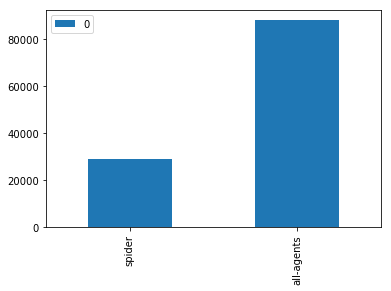

In [216]:
plothist(train_no_na.agent)

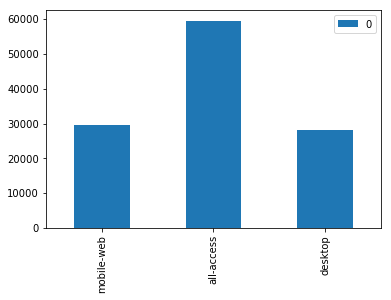

In [217]:
plothist(train_no_na.access)

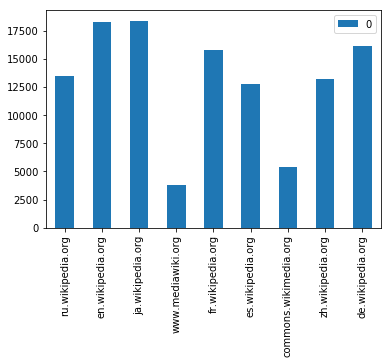

In [218]:
plothist(train_no_na.project)

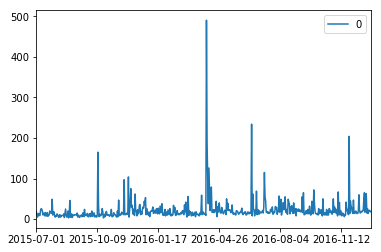

In [273]:
%matplotlib inline 
train_no_na.iloc[0:1,0:-3].T.plot()

# Strcuture the data for training

### To do

    1.how to include multiple features -> multivariate input. in keras (batch_size, timesteps, input_dim)
        1.1 effect of including features that are constant per input X(i) 
    2. check for trend, seasonality in time series
    3. make the series stationary if needed (based on 2)
    4. produce multi-step output
    5. normalize input - no needed since the scale is same
    6. check outliers
    7. structure the data to the form that Keras expects

Split the data into train, valid and test

In [575]:
data = train_no_na

In [299]:
#helper function to split dataset in to train, valid and test
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*valid_perc), int(data.shape[0]*test_perc))
    train = data[0:p1 - (p2+p3)]
    valid = data[p1 - (p2 + p3): p1 - p3]
    test = data [p1 - p3:]
    return (train, valid, test)

In [576]:
data[0:5]

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
5        12.0         7.0         4.0         5.0        20.0         8.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10   ...    2016-12-25  \
0         9.0        22.0        26.0        24.0   ...          26.0   
1        22.0        11.0        10.0         4.0   ...          15.0   
2         0.0         3.0         4.0         4.0   ...           7.0   
3        14.0         9.0        11.0        16.0   ...          27.0   
5         5.0        17.0        24.0         7.0   ...          17.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0        14.0        20.0        22.0        19.0        18.0        20.0   
1         9.0        30.0        52.0        45.0        26.0        20.0   
2         4.0         4.0         6.0         3.0         4.0        17.0   
3        16.0        11.0        17.0        19.0        10.0        11.0   
5        32.0        19.0        23.0        17.0        17.0        50.0   

            project      access   agent  
0  zh.wikipedia.org  all-access  spider  
1  zh.wikipedia.org  all-access  spider  
2  zh.wikipedia.org  all-access  spider  
3  zh.wikipedia.org  all-access  spider  
5  zh.wikipedia.org  all-access  spider  

[5 rows x 553 columns]

## Check for Trend, Seasonality

select only the time info columns

In [315]:
tr_data = data.iloc[:, 0:-3]

choose one series

In [317]:
tr_data_1 = tr_data[0:1]

In [335]:
tr_data_1.iloc[:,0:31]

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2015-07-22  \
0         9.0        22.0        26.0        24.0     ...            10.0   

   2015-07-23  2015-07-24  2015-07-25  2015-07-26  2015-07-27  2015-07-28  \
0        20.0        18.0        15.0        14.0        49.0        10.0   

   2015-07-29  2015-07-30  2015-07-31  
0        16.0        18.0         8.0  

[1 rows x 31 columns]

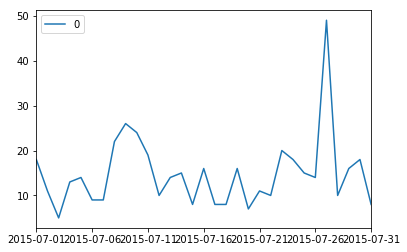

In [334]:
tr_data_1.iloc[:,0:31].T.plot()

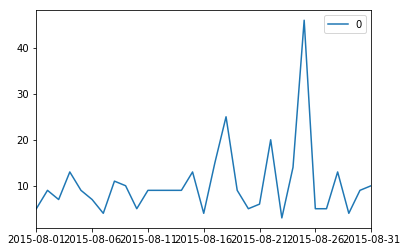

In [336]:
tr_data_1.iloc[:,31:62].T.plot()

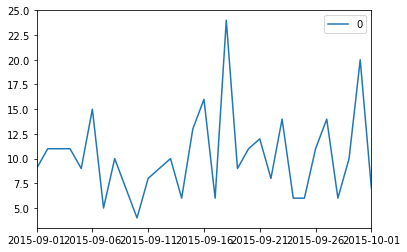

In [337]:
tr_data_1.iloc[:,62:93].T.plot()

## Check for weekly trends/seasonality

In [338]:
tr_data_1.shape

(1, 550)

In [344]:
tr_data_1.iloc[:,0],tr_data_1.iloc[:,549],

(0    18.0
 Name: 2015-07-01, dtype: float64, 0    20.0
 Name: 2016-12-31, dtype: float64)

In [360]:
tr_d_1_t = tr_data_1.T
tr_d_1_t.columns = ['views']

In [364]:
tr_d_1_t.index.name = 'date'

In [403]:
tr_d_1_t[0:5]

views
date             
2015-07-01   18.0
2015-07-02   11.0
2015-07-03    5.0
2015-07-04   13.0
2015-07-05   14.0

In [369]:
type(tr_d_1_t.index)

pandas.core.indexes.base.Index

In [370]:
tr_d_1_t.index = pd.to_datetime(tr_d_1_t.index)

In [371]:
type(tr_d_1_t.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [377]:
weekly = tr_d_1_t.groupby(pd.TimeGrouper("W"))

In [383]:
weekly.size()[0:5]

date
2015-07-05    5
2015-07-12    7
2015-07-19    7
2015-07-26    7
2015-08-02    7
Freq: W-SUN, dtype: int64

In [421]:
weekly_data = np.array([[]])
if weekly_data.size == 0:
    print("empty")

empty


In [433]:
v = [1,2,3]
print(v)
v = [0] + v
print(v)
print(len(v))


[1, 2, 3]
[0, 1, 2, 3]
4


In [496]:
weekly_data = np.array([[]])
for g,v in weekly:
    views = v.values.T
    while views.size < 7:
        views = np.append([0], views)
    views = views.reshape((1, 7))
    if weekly_data.size == 0:
        weekly_data = views
    else:
        weekly_data = np.vstack((weekly_data, views))

array([  0.,   0.,  18.,  11.,   5.,  13.,  14.])

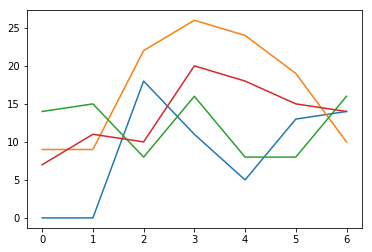

In [506]:
plt.figure(1)
for i in range(0, 4):
    plt.plot(weekly_data[i])
plt.show()

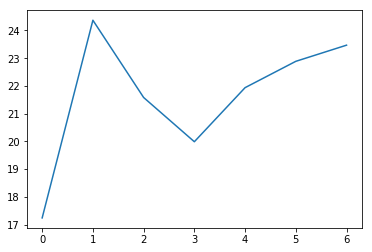

In [514]:
plt.plot(weekly_data.mean(axis = 0))
plt.show()

## Monthly

In [522]:
monthly = tr_d_1_t.groupby(pd.TimeGrouper("M"))
monthly_data = np.array([[]])
for g,v in monthly:
    views = v.values.T
    while views.size < 31:
        views = np.append([0], views)
    views = views.reshape((1, 31))
    if monthly_data.size == 0:
        monthly_data = views
    else:
        monthly_data = np.vstack((monthly_data, views))

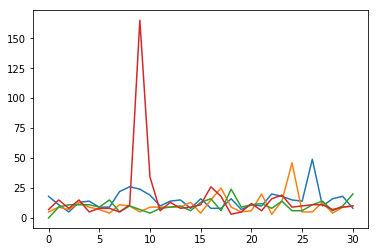

In [533]:
plt.figure(1)
for i in range(0, 4):
    plt.plot(monthly_data[i])
plt.show()

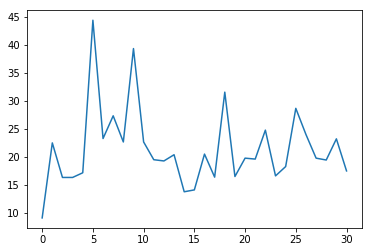

In [521]:
plt.plot(monthly_data.mean(axis = 0))
plt.show()

## Yearly

In [527]:
yearly = tr_d_1_t.groupby(pd.TimeGrouper("A"))
yearly_data = np.array([[]])
for g,v in yearly:
    views = v.values.T
    while views.size < 366:
        views = np.append([0], views)
    views = views.reshape((1, 366))
    if yearly_data.size == 0:
        yearly_data = views
    else:
        yearly_data = np.vstack((yearly_data, views))

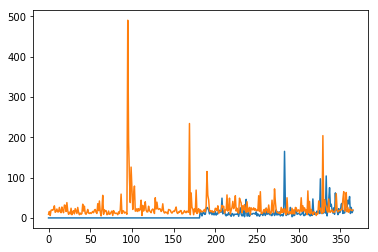

In [532]:
plt.figure(1)
for i in range(0, 2):
    plt.plot(yearly_data[i])
plt.show()

## Average accross all data

In [539]:
tr_data.shape

(117277, 550)

In [540]:
mean_data = tr_data.mean(axis = 0)

In [541]:
mean_data.shape

(550,)

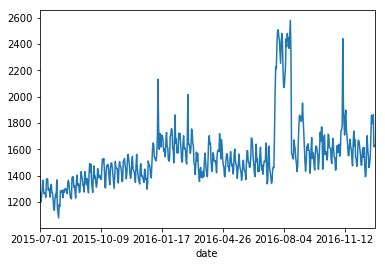

In [542]:
mean_data.plot()

In [544]:
mean_data.index = pd.to_datetime(mean_data.index)

## Weekly

In [545]:
m_weekly = mean_data.groupby(pd.TimeGrouper("W"))
m_weekly_data = np.array([[]])
for g,v in m_weekly:
    views = v.values.T
    while views.size < 7:
        views = np.append([0], views)
    views = views.reshape((1, 7))
    if m_weekly_data.size == 0:
        m_weekly_data = views
    else:
        m_weekly_data = np.vstack((m_weekly_data, views))

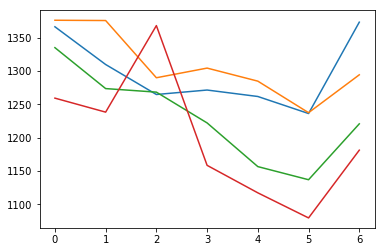

In [548]:
plt.figure(1)
for i in range(1, 5):
    plt.plot(m_weekly_data[i])
plt.show()

There seems to be some seasonality in weekly data

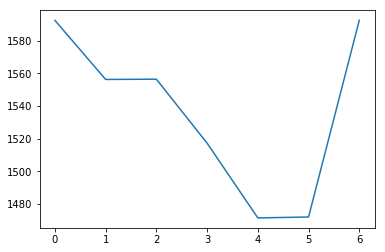

In [550]:
plt.plot(m_weekly_data.mean(axis =0))
plt.show()

## Monthly data

In [551]:
m_monthly = mean_data.groupby(pd.TimeGrouper("M"))
m_monthly_data = np.array([[]])
for g,v in m_monthly:
    views = v.values.T
    while views.size < 31:
        views = np.append([0], views)
    views = views.reshape((1, 31))
    if m_monthly_data.size == 0:
        m_monthly_data = views
    else:
        m_monthly_data = np.vstack((m_monthly_data, views))

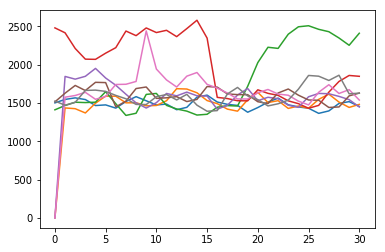

In [563]:
plt.figure(1)
for i in range(10, 18):
    plt.plot(m_monthly_data[i])
plt.show()

most of the weeks seems to follow same pattern, while there are few pages which behave differently 

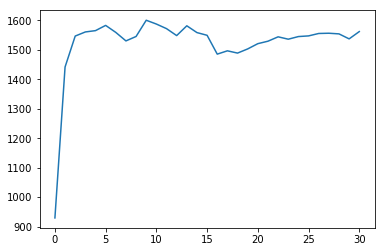

In [564]:
plt.plot(m_monthly_data.mean(axis =0))
plt.show()

## Yearly

In [565]:
m_yearly = tr_d_1_t.groupby(pd.TimeGrouper("A"))
m_yearly_data = np.array([[]])
for g,v in m_yearly:
    views = v.values.T
    while views.size < 366:
        views = np.append([0], views)
    views = views.reshape((1, 366))
    if m_yearly_data.size == 0:
        m_yearly_data = views
    else:
        m_yearly_data = np.vstack((m_yearly_data, views))

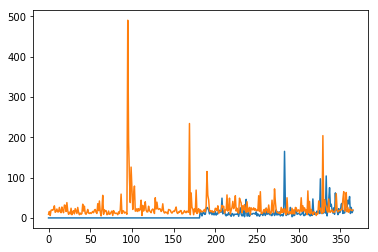

In [567]:
plt.figure(1)
for i in range(0, 2):
    plt.plot(m_yearly_data[i])
plt.show()

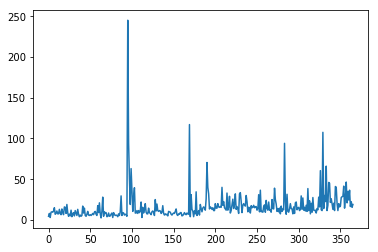

In [568]:
plt.plot(m_yearly_data.mean(axis =0))
plt.show()

## Structure the data

In [13]:
import pandas as pd
import numpy as np

In [14]:
training_set = pd.read_csv('train_1.csv')

In [15]:
stationary_fields = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [16]:
training_set = training_set.drop('Page', 1)

In [17]:
training_set[0:5]

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2016-12-22  \
0         9.0        22.0        26.0        24.0     ...            32.0   
1        22.0        11.0        10.0         4.0     ...            17.0   
2         0.0         3.0         4.0         4.0     ...             3.0   
3        14.0         9.0        11.0        16.0     ...            32.0   
4         NaN         NaN         NaN         NaN     ...            48.0   

   2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0        63.0        15.0        26.0        14.0        20.0        22.0   
1        42.0        28.0        15.0         9.0        30.0        52.0   
2         1.0         1.0         7.0         4.0         4.0         6.0   
3        10.0        26.0        27.0        16.0        11.0        17.0   
4         9.0        25.0        13.0         3.0        11.0        27.0   

   2016-12-29  2016-12-30  2016-12-31  
0        19.0        18.0        20.0  
1        45.0        26.0        20.0  
2         3.0         4.0        17.0  
3        19.0        10.0        11.0  
4        13.0        36.0        10.0  

[5 rows x 550 columns]

fill NaNs with 0

In [18]:
training_set_no_na = training_set.fillna(0)

In [19]:
stationary_fields = pd.get_dummies(stationary_fields)

In [20]:
stationary_fields.shape

(145063, 14)

In [93]:
training_set_no_na.shape

(145063, 550)

for each training set, input is the stationary fields + #lag fields

In [22]:
lag = 1

In [23]:
num_stat_fields = 0

In [89]:
def produceLagggedInput(data, lag = 1, progress_interval = 10):
    num_examples = data.shape[0]
    x_d1 = num_examples * (data.shape[1] - lag)
    x_d2 = lag
    data_x = np.empty((x_d1,x_d2))
    data_y = np.empty((x_d1, 1))
    #for reach training example
    progress = 0.0
    for i in range(0, num_examples):
        #for each date, starting from lag+1
        row = data.iloc[i]
        for j in range(lag, row.shape[0]):
            #append the stat_fields with each ow
            x = row[j - lag:j]
            y = row[j]
            #initialize the arrays
            index = i*(data.shape[1] - lag) +(j - lag)
            if (index/float(x_d1))*100 - progress > progress_interval:
                progress = (index/float(x_d1))*100
                print progress
            data_x[index]  = x
            data_y[index] = y
    return data_x, data_y

In [91]:
from sklearn.utils import shuffle
data = shuffle(training_set_no_na)

In [94]:
data.shape

(145063, 550)

In [105]:
num_examples = 150

In [106]:
subset = data.iloc[0:num_examples]

In [107]:
#helper function to split dataset in to train, valid and test
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*(valid_perc/100.0)), int(data.shape[0]*(test_perc/100.0)))
    print(p1, p2, p3)
    train = data[0:p1 - (p2+p3)]
    print("train", 0, (p1 - (p2+p3)))
    valid = data[p1 - (p2 + p3): p1 - p3]
    print("valid", (p1 - (p2+p3)), p1 - p3)
    test = data [p1 - p3:]
    print("test", (p1 - p3),data.shape[0])
    return (train, valid, test)

In [108]:
train, valid, test = splitDataset(subset, 15, 15)

(150, 22, 22)
('train', 0, 106)
('valid', 106, 128)
('test', 128, 150)


In [109]:
train_x, train_y = produceLagggedInput(train)
valid_x, valid_y = produceLagggedInput(valid)
test_x, test_y = produceLagggedInput(test)

10.0010310341
20.0020620683
30.0030931024
40.0041241365
50.0051551706
60.0061862048
70.0072172389
80.008248273
90.0092793071
10.0016559033
20.0033118066
30.0049677099
40.0066236132
50.0082795165
60.0099354198
70.0115913231
80.0132472264
90.0149031297
10.0016559033
20.0033118066
30.0049677099
40.0066236132
50.0082795165
60.0099354198
70.0115913231
80.0132472264
90.0149031297


In [113]:
train_x.shape

(58194, 1)

# Build the MODEL

In [130]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [111]:
def reshapeHelper(data, timesteps = 1):
    print(data.shape[0], timesteps, data.shape[1])
    return data.reshape(data.shape[0], timesteps, data.shape[1])

In [120]:
batch_size = 32

In [157]:
def buildLSTMModel(X, Y, units = 50, lr = 0.001, activation = 'relu'):
    adam = Adam(lr = lr)
    model = Sequential()
    print(X.shape)
    model.add(LSTM(units, input_shape=(1, X.shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation=activation))
    model.compile(optimizer=adam, loss='mean_squared_error')
    return model

In [123]:
model = buildLSTMModel(train_x, train_y)

(58194, 1)


In [128]:
history = model.fit(reshapeHelper(train_x), train_y, epochs = 10, validation_data=(reshapeHelper(valid_x), valid_y), batch_size=batch_size)

(58194, 1, 1)
(12078, 1, 1)
Train on 58194 samples, validate on 12078 samples
Epoch 1/10
58194/58194 [==============================] - 35s - loss: 42951808.8641 - val_loss: 17050426.5315
Epoch 2/10
58194/58194 [==============================] - 34s - loss: 42877156.2260 - val_loss: 16979897.0740
Epoch 3/10
58194/58194 [==============================] - 36s - loss: 42802329.2140 - val_loss: 16910996.6391
Epoch 4/10
58194/58194 [==============================] - 37s - loss: 42727332.2261 - val_loss: 16842749.5546
Epoch 5/10
58194/58194 [==============================] - 37s - loss: 42655054.3127 - val_loss: 16782943.2078
Epoch 6/10
58194/58194 [==============================] - 40s - loss: 42601136.5735 - val_loss: 16722497.6788
Epoch 7/10
58194/58194 [==============================] - 42s - loss: 42534346.8791 - val_loss: 16659749.424886
Epoch 8/10
58194/58194 [==============================] - 41s - loss: 42469345.6694 - val_loss: 16597354.6824
Epoch 9/10
58194/58194 [================

In [125]:
%matplotlib inline
from matplotlib import pylab as plt
from bokeh.charts import TimeSeries, output_file, show
from bokeh.io import output_notebook
output_notebook()

/Users/vviswanath/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

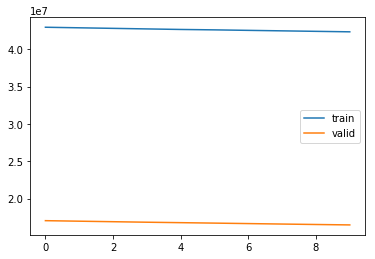

In [129]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()

- may be dying Relu problem: https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks
- or due to lower learning rate
- lack of normalization/standardization
- or increase the number of units in LSTM

In [132]:
#increase learning rate
model = buildLSTMModel(train_x, train_y, lr=0.01)
history = model.fit(reshapeHelper(train_x), train_y, epochs = 10, validation_data=(reshapeHelper(valid_x), valid_y), batch_size=batch_size)

(58194, 1)
(58194, 1, 1)
(12078, 1, 1)
Train on 58194 samples, validate on 12078 samples
Epoch 1/10
58194/58194 [==============================] - 43s - loss: 42765686.1951 - val_loss: 16958575.4489
Epoch 2/10
58194/58194 [==============================] - 42s - loss: 42237886.2550 - val_loss: 16240808.4408
Epoch 3/10
58194/58194 [==============================] - 42s - loss: 41929488.6645 - val_loss: 15883839.3026
Epoch 4/10
58194/58194 [==============================] - 39s - loss: 41946712.8598 - val_loss: 16501206.4084
Epoch 5/10
58194/58194 [==============================] - 39s - loss: 42265942.4703 - val_loss: 16519813.0414
Epoch 6/10
58194/58194 [==============================] - 38s - loss: 42254125.2793 - val_loss: 16512602.3128
Epoch 7/10
58194/58194 [==============================] - 39s - loss: 42246440.3171 - val_loss: 16511212.7898
Epoch 8/10
58194/58194 [==============================] - 38s - loss: 42266736.8867 - val_loss: 16524424.0129
Epoch 9/10
58194/58194 [=======

In [133]:
def visualizeLoss(history):
    plt.plot(history.history['loss'], label ='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.legend()

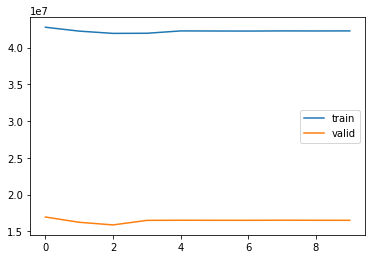

In [134]:
visualizeLoss(history)

In [151]:
#normalize input
from sklearn.utils import shuffle
def preprocessData(data, normalize = True, subset_size = -1, lag = 1, nan_handler = 'drop', shuffle_data = True, val_perc = 10, test_perc=10):
    #Nan handling
    if nan_handler == 'drop':
        data = data.dropna()
    elif nan_handler == 'zero':
        data = data.fillna(0)
    
    #shuffle
    if shuffle_data:
        data = shuffle(data)
    
    #take subset
    if subset_size != -1:
        data = data[0:subset_size]
    
    #normalize
    if normalize:
        data_norm = (data - data.mean()) / (data.max() - data.min())
    
    train, valid, test = splitDataset(data_norm, val_perc, test_perc)
    train_x, train_y = produceLagggedInput(train,lag=lag)
    valid_x, valid_y = produceLagggedInput(valid,lag=lag)
    test_x, test_y = produceLagggedInput(test,lag=lag)
    
    return train_x, train_y, valid_x, valid_y, test_x, test_y

In [152]:
train_x, train_y, valid_x, valid_y, test_x, test_y = preprocessData(training_set, subset_size=100)

(100, 10, 10)
('train', 0, 80)
('valid', 80, 90)
('test', 90, 100)
10.002276867
20.0045537341
30.0068306011
40.0091074681
50.0113843352
60.0136612022
70.0136612022
80.0159380692
90.0182149362
10.0182149362
20.0364298725
30.0546448087
40.072859745
50.0910746812
60.0910746812
70.1092896175
80.1275045537
90.14571949
10.0182149362
20.0364298725
30.0546448087
40.072859745
50.0910746812
60.0910746812
70.1092896175
80.1275045537
90.14571949


In [153]:
train_x[0:10]

array([[-0.02838557],
       [-0.03725727],
       [-0.03511681],
       [-0.02524129],
       [-0.02439909],
       [-0.03034854],
       [-0.03505029],
       [-0.04034413],
       [-0.0433332 ],
       [-0.04159372]])

In [179]:
def buildAndFitLSTM(train_x, train_y, valid_x, valid_y, activation = 'relu', lr = 0.01, epochs = 10, batch_size = 32):
    model = buildLSTMModel(train_x, train_y, lr=lr, activation=activation)
    history = model.fit(reshapeHelper(train_x), train_y, epochs = epochs,  validation_data=(reshapeHelper(valid_x), valid_y), batch_size=batch_size)
    return history, model

In [ ]:
history, model = buildAndFitLSTM(train_x, train_y, valid_x, valid_y)

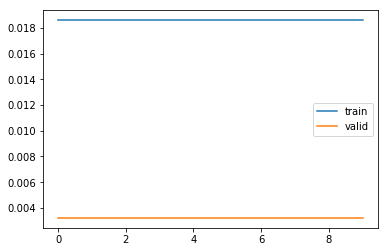

In [156]:
visualizeLoss(history)

In [184]:
#trying with tanh activation
history, model = buildAndFitLSTM(train_x, train_y, valid_x, valid_y, activation='tanh', epochs=10)

(43920, 1)
(43920, 1, 1)
(5490, 1, 1)
Train on 43920 samples, validate on 5490 samples
Epoch 1/10
43920/43920 [==============================] - 34s - loss: 0.0035 - val_loss: 0.0012
Epoch 2/10
43920/43920 [==============================] - 28s - loss: 0.0033 - val_loss: 0.0012
Epoch 3/10
43920/43920 [==============================] - 28s - loss: 0.0031 - val_loss: 0.0014
Epoch 4/10
43920/43920 [==============================] - 27s - loss: 0.0031 - val_loss: 0.0013
Epoch 5/10
43920/43920 [==============================] - 27s - loss: 0.0031 - val_loss: 0.0016
Epoch 6/10
43920/43920 [==============================] - 27s - loss: 0.0031 - val_loss: 0.0013
Epoch 7/10
43920/43920 [==============================] - 27s - loss: 0.0031 - val_loss: 0.0012
Epoch 8/10
43920/43920 [==============================] - 28s - loss: 0.0030 - val_loss: 0.0013
Epoch 9/10
43920/43920 [==============================] - 27s - loss: 0.0030 - val_loss: 0.0013
Epoch 10/10
43920/43920 [========================

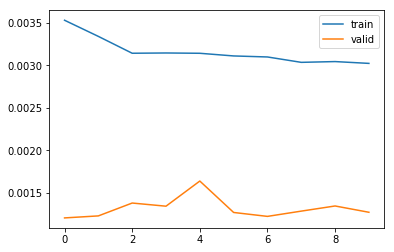

In [185]:
visualizeLoss(history)

In [161]:
#train for 100 epochs
history,model = buildAndFitLSTM(train_x, train_y, valid_x, valid_y, activation='tanh', epochs=100)

(43920, 1)
(43920, 1, 1)
(5490, 1, 1)
Train on 43920 samples, validate on 5490 samples
Epoch 1/100
43920/43920 [==============================] - 31s - loss: 0.0035 - val_loss: 0.0017
Epoch 2/100
43920/43920 [==============================] - 27s - loss: 0.0033 - val_loss: 0.0013
Epoch 3/100
43920/43920 [==============================] - 26s - loss: 0.0031 - val_loss: 0.0014
Epoch 4/100
43920/43920 [==============================] - 26s - loss: 0.0031 - val_loss: 0.0013
Epoch 5/100
43920/43920 [==============================] - 26s - loss: 0.0031 - val_loss: 0.0010
Epoch 6/100
43920/43920 [==============================] - 26s - loss: 0.0031 - val_loss: 0.0014
Epoch 7/100
43920/43920 [==============================] - 26s - loss: 0.0030 - val_loss: 0.0013
Epoch 8/100
43920/43920 [==============================] - 26s - loss: 0.0031 - val_loss: 0.0012
Epoch 9/100
43920/43920 [==============================] - 26s - loss: 0.0030 - val_loss: 0.0013
Epoch 10/100
43920/43920 [==============

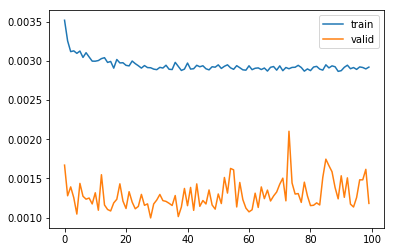

In [162]:
visualizeLoss(history)

In [186]:
predictions = model.predict(reshapeHelper(test_x))

(5490, 1, 1)


In [187]:
test_y.shape

(5490, 1)

In [212]:
from bokeh.charts import TimeSeries, output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure
output_notebook()
%matplotlib inline
from matplotlib import pylab as plt

def plotActualVsPrediction(actual, prediction):
    p = figure(
            tools="pan,box_zoom,reset,save", 
            y_axis_label ="views-normalized",
            x_axis_label ="day-num"
        )
    p.line(range(0, predictions.size), predictions.reshape((predictions.shape[0])), color="blue", legend="predictions")
    p.line(range(0, test_y.size), test_y.reshape((test_y.shape[0])), color="red", legend="actual")
    show(p)

Loading BokehJS ...

In [213]:
plotActualVsPrediction(actual=test_y, prediction=predictions)

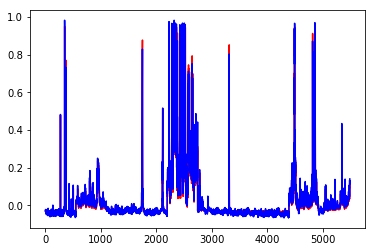

In [214]:
#matplotlib
plt.plot(predictions, color="red", label="predictions")
plt.plot(test_y, color="blue", label="actual")
plt.show()